# K Nearest Neighbors Project 

.
## Import Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
from google.colab import files
files.upload()

Saving KNN_Project_Data to KNN_Project_Data


{'KNN_Project_Data': b'XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS\n1636.6706142430203,817.9885253507288,2565.9951889327103,358.34716327779535,550.4174908535903,1618.8708966565232,2147.641253749742,330.72789262567693,1494.878630941794,845.1360880898293,0\n1013.4027598314907,577.5873317065663,2644.1412725836963,280.42820339449435,1161.8733913229291,2084.107871810679,853.4049813963692,447.15761939822625,1193.0325206130913,861.0818088449158,1\n1300.0355007372152,820.5186973189192,2025.854468817945,525.5622916717391,922.206261309821,2552.355406517483,818.676686271301,845.4914920482372,1968.367513467638,1647.1862906769516,1\n1059.3475419516758,1066.8664177521568,612.0000407362213,480.82778916030634,419.46749461110176,685.6669825525098,852.8678103470528,341.66478398330946,1154.3913680901114,1450.9353569822388,0\n1018.3405256836501,1313.6790555497523,950.6226611030015,724.7421744729451,843.0659034311782,1370.5541635750624,905.4694531315494,658.1182023504416,539.459349571176

In [5]:
dataframe=pd.read_csv("KNN_Project_Data")
dataframe.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Check the head of the dataframe.**

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

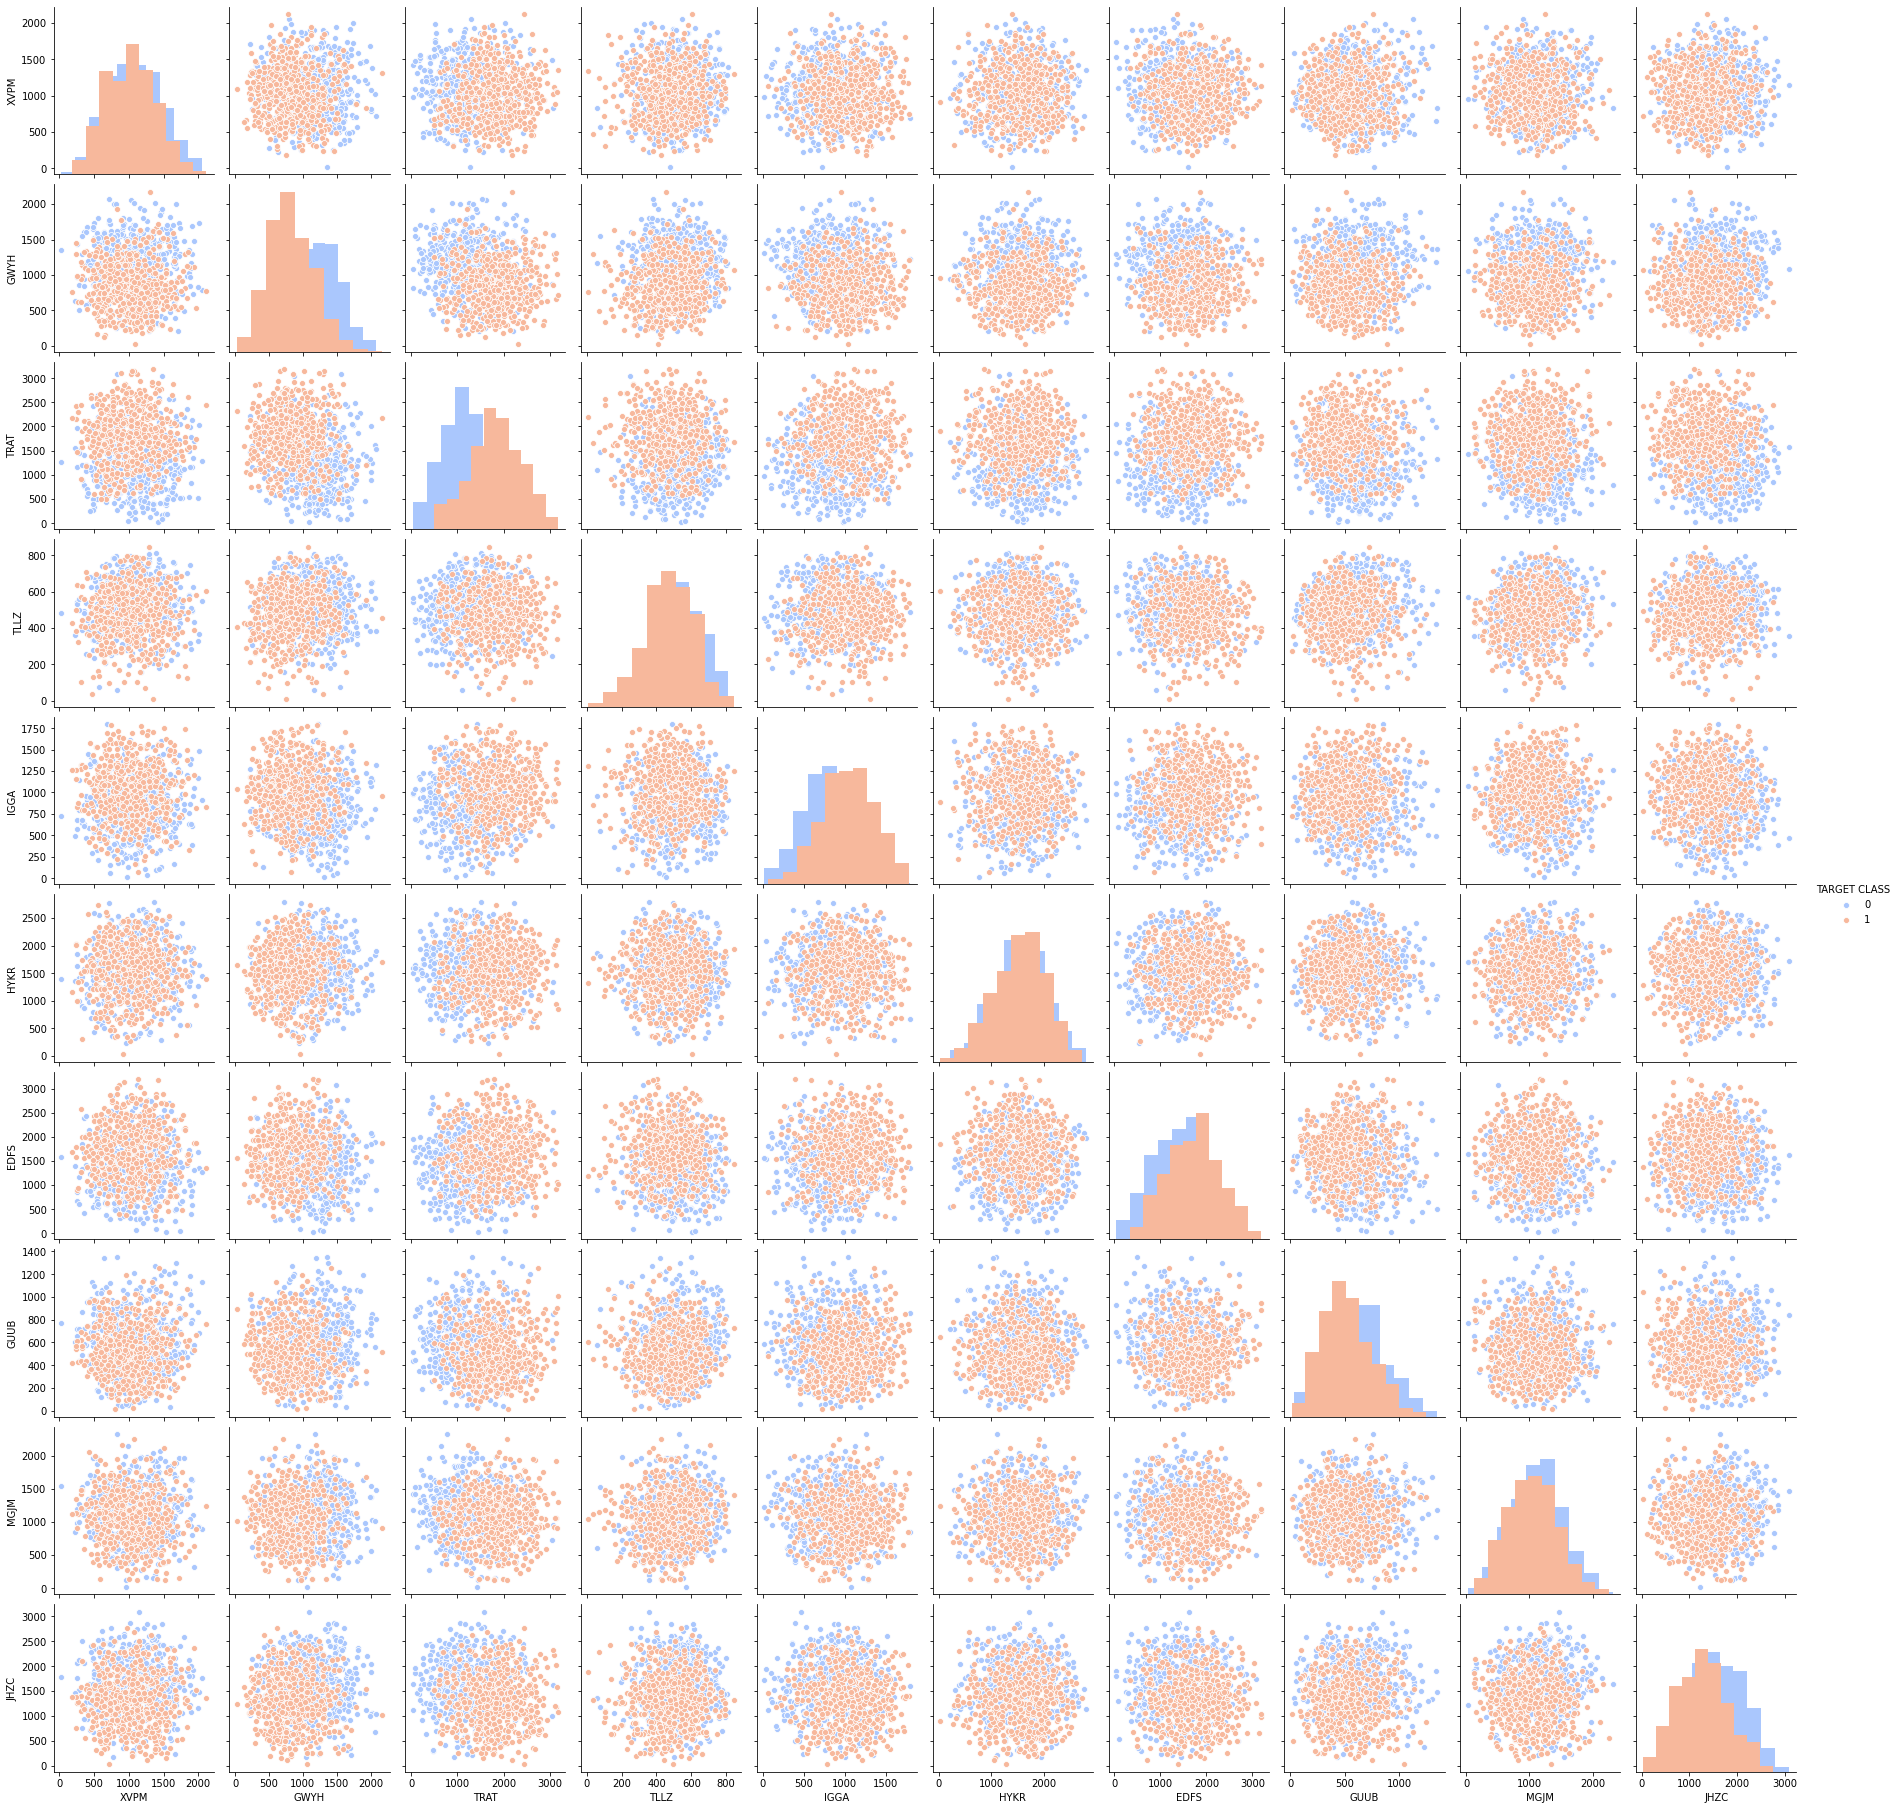

In [6]:
sns.pairplot(dataframe,hue="TARGET CLASS",diag_kind="hist",palette="coolwarm")

In [7]:
from  sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(dataframe.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features=scaler.transform(dataframe.drop("TARGET CLASS",axis=1))

In [11]:
df_feat=pd.DataFrame(scaled_features,columns=dataframe.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split


In [12]:
from sklearn.model_selection import train_test_split

In [40]:
X=df_feat
y=dataframe["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

**n_neighbors=1**

In [42]:
knn=KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [44]:
pred=knn.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value


In [48]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))

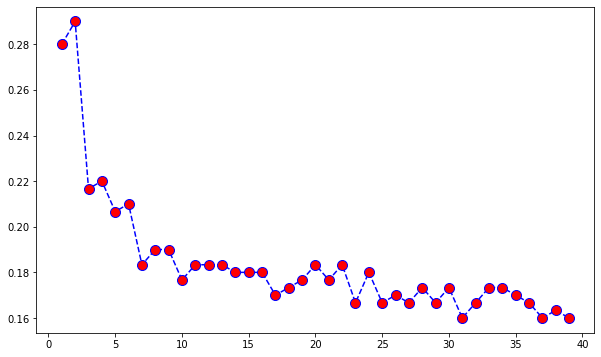

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,ls="--",color="blue",marker="o",markerfacecolor="red",markersize=10)

In [50]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("WITH K=30")
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

WITH K=30
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



[[124  28]
 [ 24 124]]
